In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import os, random

from skimage.exposure import equalize_adapthist
from sklearn.model_selection import train_test_split

In [3]:
FolderPath = "../../dataset/ultrasound_nerve_segmentation/"

In [4]:
print("Load Data...")
trainImages = np.load(FolderPath + 'Train.npy')
trainMasks = np.load(FolderPath + 'Masks.npy')

Load Data...


In [5]:
trainImages.shape, trainMasks.shape

((11270, 420, 580), (11270, 420, 580))

In [6]:
def exposure_image(X,y):
    Xf = np.array(X)
    yf = np.array(y)
    for i in xrange(X.shape[0]):
        Xf[i] = equalize_adapthist(X[i])
        yf[i] = equalize_adapthist(y[i])
    
    return Xf,yf

In [7]:
#test code
X_test, y_test = exposure_image(trainImages[0:5,:,:], trainMasks[0:5,:,:])

/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/usr/local/lib/python2.7/dist-packages/skimage/exposure/exposure.py:307: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)


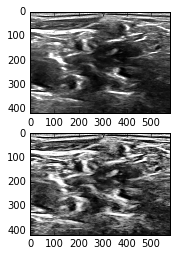

In [8]:
#test code
plt.figure(50)
plt.subplot(211)
plt.imshow(trainImages[4,:,:],cmap='gray')

plt.subplot(212)
plt.imshow(X_test[4,:,:],cmap='gray')

In [9]:
trainImages, trainMasks = exposure_image(trainImages,trainMasks)

In [10]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(trainImages,
                                                    trainMasks,
                                                    test_size=0.2,
                                                    random_state=42)

In [11]:
np.save(FolderPath + "X_Train.npy", X_Train)
np.save(FolderPath + "Y_Train.npy", Y_Train)
np.save(FolderPath + "X_Test.npy", X_Test)
np.save(FolderPath + "Y_Test.npy", Y_Test)

In [13]:
X_Train.shape, X_Test.shape, Y_Train.shape, Y_Test.shape

((9016, 420, 580), (2254, 420, 580), (9016, 420, 580), (2254, 420, 580))